# Importing Libraries

In [121]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sea
import numpy as np

# Importing Data Set

In [142]:
df = pd.read_csv("Customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Incepection Of Data

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing Blank values into 0 and replacing Converting object in float

In [124]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

# Finding Null Values

In [125]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Finding Duplicates

In [126]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [127]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Checking Duplicate using Uniq Value

In [128]:
df["customerID"].duplicated().sum()

np.int64(0)

# Converted 0 and 1 in seniorcitizen to yes/no to make it easy to understand

In [143]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


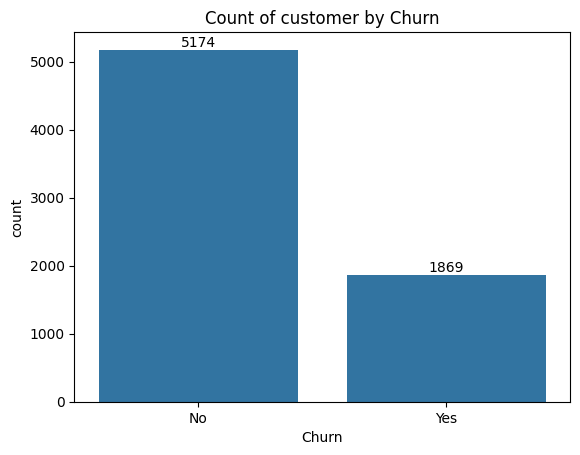

In [130]:
sa = sea.countplot(data = df, x = "Churn")
sa.bar_label(sa.containers[0])
mp.title("Count of customer by Churn"
mp.show()

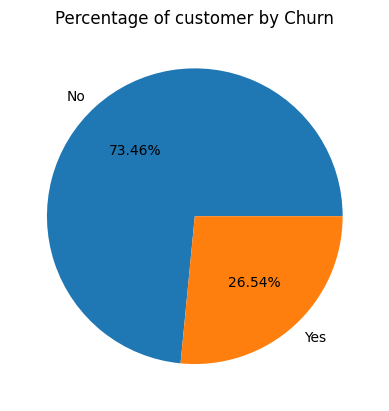

In [131]:
gb = df.groupby ("Churn").agg({"Churn":"count"})
gb

mp.pie(gb["Churn"], labels = gb.index,autopct = "%1.2f%%")
mp.title("Percentage of customer by Churn")
mp.show()

# from the given pie chart conclude that 26.54% custmers are Churned Out.
# now explore the reason behind it

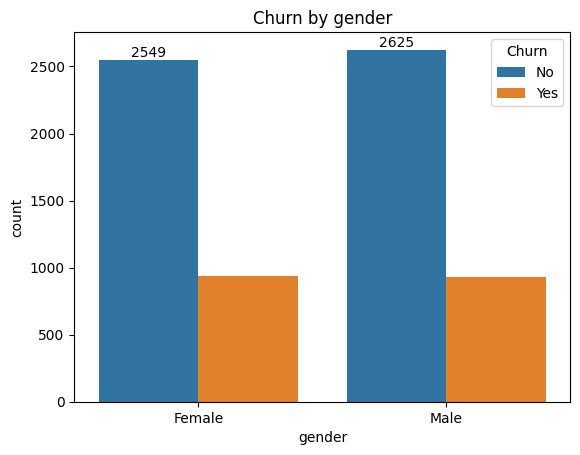

In [132]:
sa = sea.countplot(x = "gender",data = df,hue = "Churn")
sa.bar_label(sa.containers[0])
mp.title("Churn by gender")
mp.show()

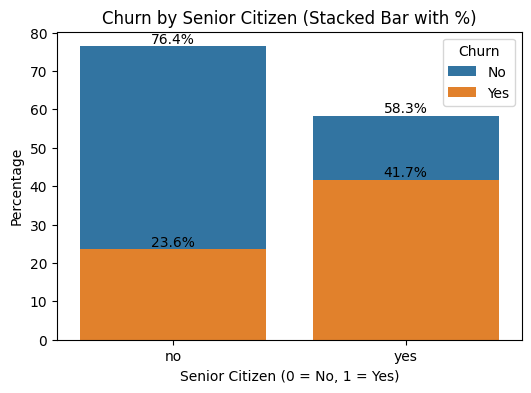

In [133]:
total = df.groupby('SeniorCitizen')['Churn'].count()
percentage = df.groupby(['SeniorCitizen', 'Churn']).size().div(total, level=0) * 100

# Convert to DataFrame for Seaborn
df_pct = percentage.reset_index().rename(columns={0: 'Percentage'})

# Plot
mp.figure(figsize=(6,4))
sa = sea.barplot(
    x="SeniorCitizen", 
    y="Percentage", 
    hue="Churn", 
    data=df_pct, 
    dodge=False  # Stacked bars
)

# Add percentage labels
for container in sa.containers:
    sa.bar_label(container, fmt="%.1f%%")

mp.title("Churn by Senior Citizen (Stacked Bar with %)")
mp.ylabel("Percentage")
mp.xlabel("Senior Citizen (0 = No, 1 = Yes)")
mp.show()

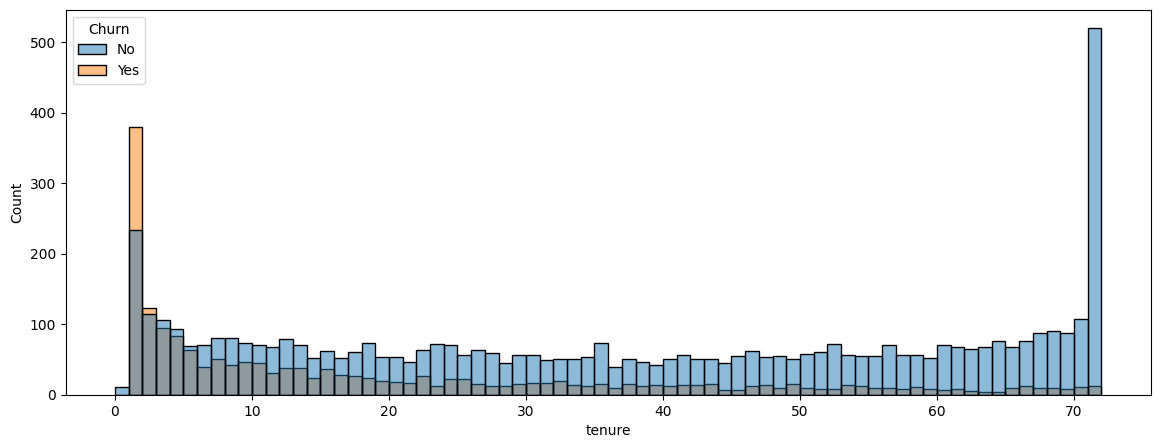

In [134]:
mp.figure(figsize = (14,5))
sea.histplot(x = "tenure",data = df, bins = 72, hue = "Churn")
mp.show()

#people who have used our services for a long time have stayed and people who have used our services
#1 Or 2 months have Churned

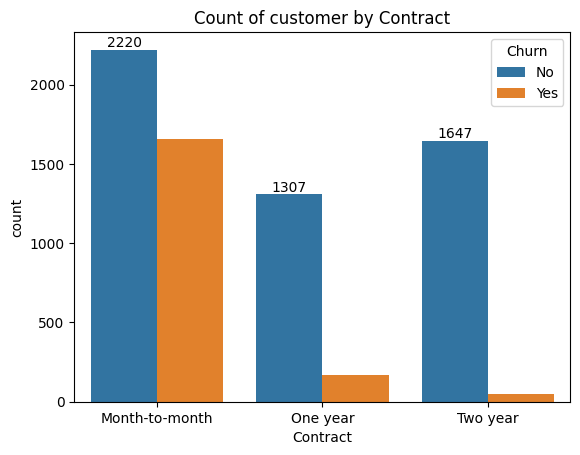

In [135]:
sa = sea.countplot(data = df, x = "Contract",hue = "Churn")
sa.bar_label(sa.containers[0])
mp.title("Count of customer by Contract")
mp.show()

#month to month contract churn the most comperitivly 1 and 2 year contract

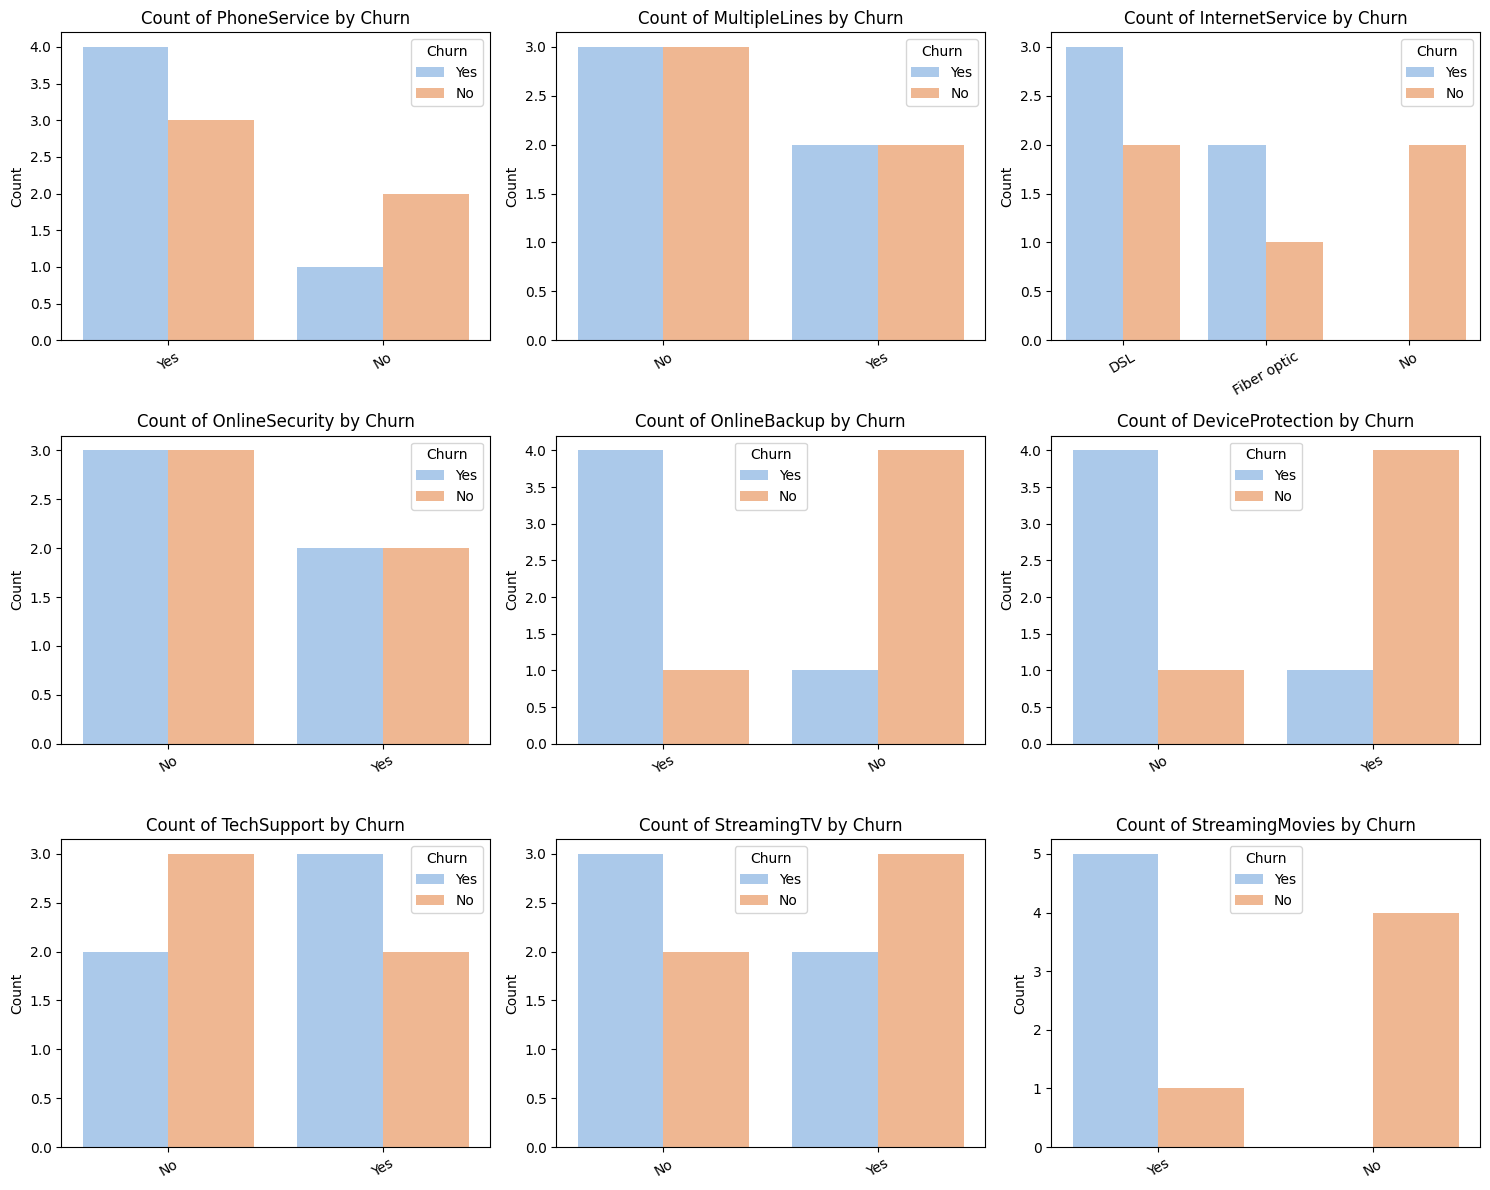

In [136]:
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'MultipleLines': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'DSL', 'DSL'],
    'OnlineSecurity': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'OnlineBackup': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    'DeviceProtection': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'TechSupport': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'StreamingTV': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Define columns
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns)
fig, axes = mp.subplots(3, 3, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create countplots with 'Churn' as hue
for i, col in enumerate(cols):
    sea.countplot(x=df[col], hue=df["Churn"], ax=axes[i], palette="pastel")
    axes[i].set_title(f"Count of {col} by Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # Rotate labels for better readability

# Adjust layout
mp.tight_layout()
mp.show()

#The count plots show the distribution of various telecom services across customers who churned versus those who stayed. Features like **OnlineSecurity, OnlineBackup, and TechSupport** indicate a visible difference in churn behavior, suggesting they may impact customer retention.

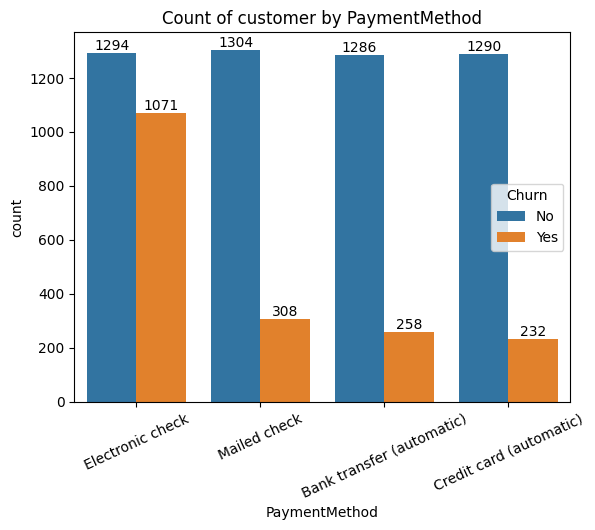

In [149]:
sa = sea.countplot(data = df, x = "PaymentMethod",hue = "Churn")
sa.bar_label(sa.containers[0])
sa.bar_label(sa.containers[1])
mp.title("Count of customer by PaymentMethod")
mp.xticks(rotation = 25)
mp.show()

#customers is likly churn when he is usingn electronic check as a payment

C:\Users\sanju\AppData\Local\Temp\ipykernel_11864\2029060662.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\sanju\AppData\Local\Temp\ipykernel_11864\2029060662.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\sanju\AppData\Local\Temp\ipykernel_11864\2029060662.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


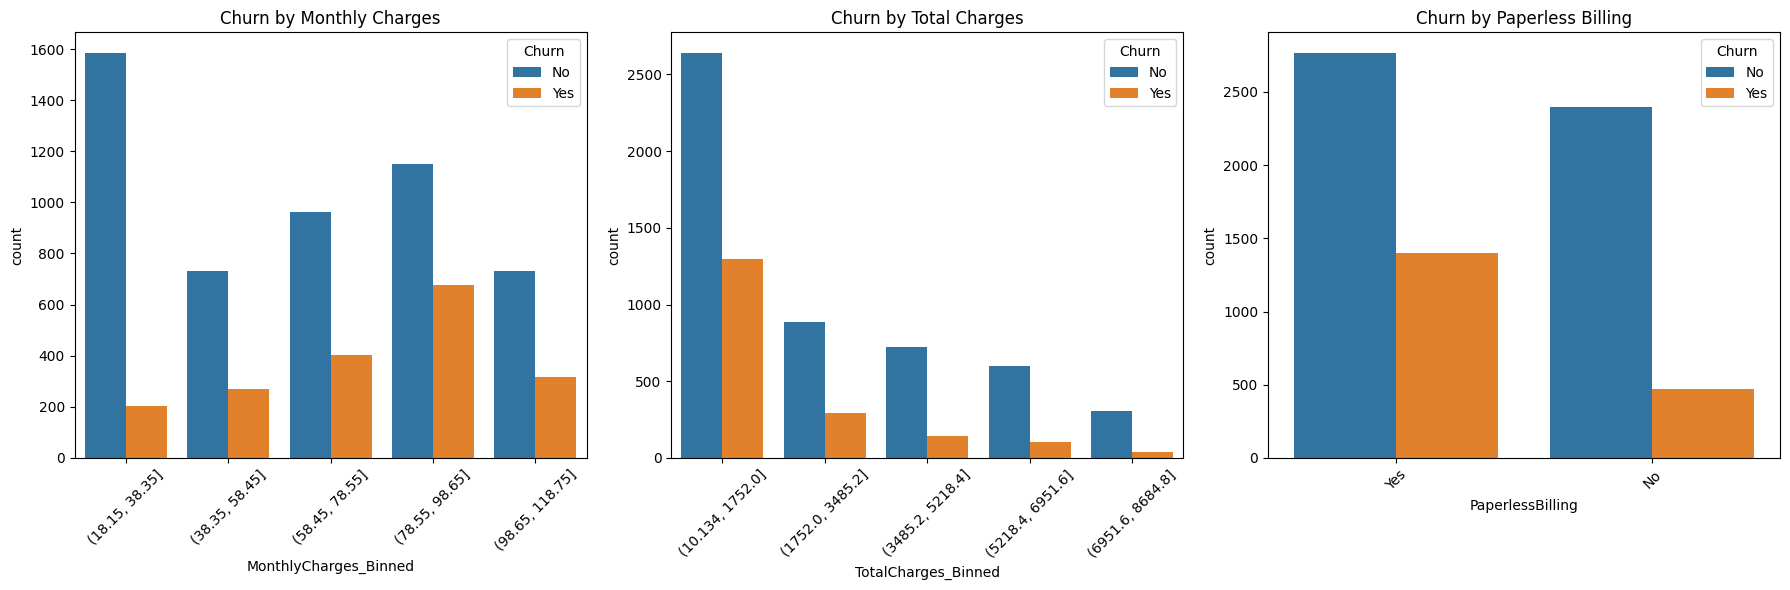

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = df.dropna(subset=["MonthlyCharges", "TotalCharges", "PaperlessBilling", "Churn"])


df["PaperlessBilling"] = df["PaperlessBilling"].astype(str)
df["Churn"] = df["Churn"].astype(str)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')  # Convert to numeric


df["MonthlyCharges_Binned"] = pd.cut(df["MonthlyCharges"], bins=5)  # 5 bins
df["TotalCharges_Binned"] = pd.cut(df["TotalCharges"], bins=5)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns


sns.countplot(data=df, x="MonthlyCharges_Binned", hue="Churn", ax=axes[0])
axes[0].set_title("Churn by Monthly Charges")

sns.countplot(data=df, x="TotalCharges_Binned", hue="Churn", ax=axes[1])
axes[1].set_title("Churn by Total Charges")

sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=axes[2])
axes[2].set_title("Churn by Paperless Billing")


for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()